In [4]:
import pandas as pd
import numpy as np
from tensorflow import keras

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


def setup_dataset(text):
  import shutil
  import os
  %cd /content/gdrive/My Drive/Kaggle/
  strings = text.split(' ')[-1]
  folder = strings.split('/')[1]
  os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle/"+folder
  print(strings)
  print(folder)
  !mkdir $folder
  shutil.copy2("kaggle.json","./"+folder+"/kaggle.json")
  %cd $folder
  !kaggle datasets download -d $strings
  
setup_dataset("kaggle datasets download -d sulianova/cardiovascular-disease-dataset")

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle
sulianova/cardiovascular-disease-dataset
cardiovascular-disease-dataset
/content/gdrive/My Drive/Kaggle/cardiovascular-disease-dataset
  0% 0.00/742k [00:00<?, ?B/s]
100% 742k/742k [00:00<00:00, 40.7MB/s]


In [2]:
!unzip cardiovascular-disease-dataset.zip

Archive:  cardiovascular-disease-dataset.zip
  inflating: cardio_train.csv        


In [10]:
df = pd.read_csv("cardio_train.csv",sep=';')

In [11]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [12]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [13]:
x.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,18393,2,168,62.0,110,80,1,1,0,0,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0


##Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify = y)

In [23]:
len(x_train)

56000

##Feature Scaling ( Always Required in DL)

In [17]:
from sklearn.preprocessing import RobustScaler

In [18]:
rs = RobustScaler()

In [19]:
x_train = rs.fit_transform(x_train)

In [20]:
x_test = rs.fit_transform(x_test)

##Create ANN

In [96]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [97]:
input_dim = x_train.shape[1]

In [98]:
input_dim

12

In [99]:
clf = Sequential()

In [100]:
#First Hidden Layer
clf.add(Dense(64,activation="softplus",kernel_initializer="he_normal",input_dim = input_dim))

In [101]:
#Second Hidden Layer 
clf.add(Dense(16,activation="softplus",kernel_initializer="he_normal",input_dim = 64))

In [102]:
#Third Hidden Layer 
clf.add(Dense(4,activation="softplus",kernel_initializer="he_normal",input_dim = 16))

In [103]:
#Final Layer 
clf.add(Dense(1,activation="sigmoid",kernel_initializer="glorot_uniform",input_dim = 4))

In [104]:
#Compile the ANN
clf.compile(optimizer="adam",loss = "binary_crossentropy",metrics=["accuracy"])

In [105]:
#Get Summary of the model created 
clf.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 64)                832       
_________________________________________________________________
dense_18 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 5         
Total params: 1,945
Trainable params: 1,945
Non-trainable params: 0
_________________________________________________________________


##Training

In [106]:
model_history = clf.fit(x_train,y_train,validation_split=0.2,batch_size=1000,epochs=50,workers = -1)

Epoch 1/50
45/45 [==============================] - 1s 7ms/step - loss: 0.7179 - accuracy: 0.5292 - val_loss: 0.6388 - val_accuracy: 0.6763
Epoch 2/50
45/45 [==============================] - 0s 4ms/step - loss: 0.6272 - accuracy: 0.6898 - val_loss: 0.5818 - val_accuracy: 0.7164
Epoch 3/50
45/45 [==============================] - 0s 5ms/step - loss: 0.5935 - accuracy: 0.7137 - val_loss: 0.5718 - val_accuracy: 0.7268
Epoch 4/50
45/45 [==============================] - 0s 4ms/step - loss: 0.5778 - accuracy: 0.7212 - val_loss: 0.5648 - val_accuracy: 0.7290
Epoch 5/50
45/45 [==============================] - 0s 4ms/step - loss: 0.5671 - accuracy: 0.7253 - val_loss: 0.5585 - val_accuracy: 0.7317
Epoch 6/50
45/45 [==============================] - 0s 4ms/step - loss: 0.5650 - accuracy: 0.7233 - val_loss: 0.5543 - val_accuracy: 0.7348
Epoch 7/50
45/45 [==============================] - 0s 4ms/step - loss: 0.5597 - accuracy: 0.7247 - val_loss: 0.5520 - val_accuracy: 0.7356
Epoch 8/50
45/45 [==

##Testing on Test Data

In [107]:
y_pred = clf.predict(x_test)

In [108]:
y_pred = y_pred>0.5

In [109]:
from sklearn.metrics import confusion_matrix

In [110]:
print(confusion_matrix(y_test,y_pred))

[[5364 1640]
 [2038 4958]]


In [111]:
from sklearn.metrics import accuracy_score

In [112]:
score = accuracy_score(y_test,y_pred)

In [113]:
print(score)

0.7372857142857143


##Plot Model Performance

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


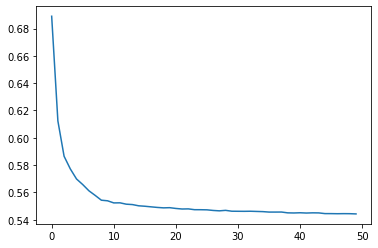

In [116]:
plt.plot(model_history.history["loss"])

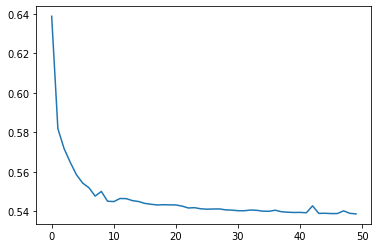

In [117]:
plt.plot(model_history.history["val_loss"])